In [1]:
import pandas as pd
import numpy as np
import sklearn.model_selection
import re



In [2]:
df = pd.read_csv("properties-unique.csv")

In [3]:
df

,city,prop_type,prop_size,prop_desc,prop_price
0,reading,1,"1,340 Sq Ft","3rd Floor Office With Entry Phone System, Thir...","- £340,000.00"
1,reading,1,"685 to 2,100 Sq Ft","Unit 1 Cutbush Court, Danehill, Reading, RG6 4UW","- £550,000.00"
2,reading,1,"2,352 Sq Ft","Commercial Property Investment, Evolution Hous...",NaN
3,reading,1,"2,936 Sq Ft","Bracknell Branch, Staverton House, 3-5 Eastham...",NaN
4,reading,1,"1,534 Sq Ft","Bracknell Branch, 16 Wellington Business Park,...",NaN
...,...,...,...,...,...
1337,swindon,6,NaN,FOR SALE BY PUBLIC AUCTION unless previously s...,NaN
1338,swindon,6,NaN,"Olivers Court, Shepherds Spring Lane, Andover,...",NaN
1339,swindon,6,"22,526 Sq Ft","Willow Court, Minns Business Park, Oxford, OX2...","- £8,500,000.00"
1340,swindon,6,82799 Sq Ft,Residential development land with planning per...,NaN


# Dealing with Null values

In [4]:
df.isnull().sum(axis=0)

city            0
prop_type       0
prop_size      38
prop_desc       0
prop_price    718
dtype: int64

In [5]:
#Here we drop the rows with null values
df = df.dropna()

In [6]:
df

,city,prop_type,prop_size,prop_desc,prop_price
0,reading,1,"1,340 Sq Ft","3rd Floor Office With Entry Phone System, Thir...","- £340,000.00"
1,reading,1,"685 to 2,100 Sq Ft","Unit 1 Cutbush Court, Danehill, Reading, RG6 4UW","- £550,000.00"
7,reading,1,461 Sq Ft,"Parkgate House, 185-187 London Road, Camberley...","- £210,000.00"
10,reading,1,"3,502 Sq Ft","Office Building, May Suit Other Uses, WG House...","- £900,000.00"
11,reading,1,"2,034 Sq Ft","Offices Suitable For Alternative Uses, 4 Newma...","- £457,500.00"
...,...,...,...,...,...
1327,bristol,6,"1 to 10,944 Sq Ft",43 Bed Student Accommodation Investment Opport...,"- £4,950,000.00"
1329,bristol,6,"3,000 Sq Ft","56 Staple Hill Road, Bristol, BS16 5BS","- £260,000.00"
1334,bristol,6,"4,014 Sq Ft",For Sale - Student Development Opportunity in ...,"- £600,000.00"
1336,swindon,6,"1,012 Sq Ft","98 Ock Street, Abingdon, OX14 5DH","- £200,000.00"


# Feature engineering the data

In [7]:
df['prop_price'] = df['prop_price'].str.replace('- £','')

/Users/asadimam/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
df

,city,prop_type,prop_size,prop_desc,prop_price
0,reading,1,"1,340 Sq Ft","3rd Floor Office With Entry Phone System, Thir...","340,000.00"
1,reading,1,"685 to 2,100 Sq Ft","Unit 1 Cutbush Court, Danehill, Reading, RG6 4UW","550,000.00"
7,reading,1,461 Sq Ft,"Parkgate House, 185-187 London Road, Camberley...","210,000.00"
10,reading,1,"3,502 Sq Ft","Office Building, May Suit Other Uses, WG House...","900,000.00"
11,reading,1,"2,034 Sq Ft","Offices Suitable For Alternative Uses, 4 Newma...","457,500.00"
...,...,...,...,...,...
1327,bristol,6,"1 to 10,944 Sq Ft",43 Bed Student Accommodation Investment Opport...,"4,950,000.00"
1329,bristol,6,"3,000 Sq Ft","56 Staple Hill Road, Bristol, BS16 5BS","260,000.00"
1334,bristol,6,"4,014 Sq Ft",For Sale - Student Development Opportunity in ...,"600,000.00"
1336,swindon,6,"1,012 Sq Ft","98 Ock Street, Abingdon, OX14 5DH","200,000.00"


In [9]:
df['prop_price'] = df['prop_price'].str.replace(',','')

/Users/asadimam/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
df

,city,prop_type,prop_size,prop_desc,prop_price
0,reading,1,"1,340 Sq Ft","3rd Floor Office With Entry Phone System, Thir...",340000.00
1,reading,1,"685 to 2,100 Sq Ft","Unit 1 Cutbush Court, Danehill, Reading, RG6 4UW",550000.00
7,reading,1,461 Sq Ft,"Parkgate House, 185-187 London Road, Camberley...",210000.00
10,reading,1,"3,502 Sq Ft","Office Building, May Suit Other Uses, WG House...",900000.00
11,reading,1,"2,034 Sq Ft","Offices Suitable For Alternative Uses, 4 Newma...",457500.00
...,...,...,...,...,...
1327,bristol,6,"1 to 10,944 Sq Ft",43 Bed Student Accommodation Investment Opport...,4950000.00
1329,bristol,6,"3,000 Sq Ft","56 Staple Hill Road, Bristol, BS16 5BS",260000.00
1334,bristol,6,"4,014 Sq Ft",For Sale - Student Development Opportunity in ...,600000.00
1336,swindon,6,"1,012 Sq Ft","98 Ock Street, Abingdon, OX14 5DH",200000.00


In [11]:
df['prop_size'] = df['prop_size'].str.replace('Sq Ft','')

/Users/asadimam/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
df

,city,prop_type,prop_size,prop_desc,prop_price
0,reading,1,"1,340","3rd Floor Office With Entry Phone System, Thir...",340000.00
1,reading,1,"685 to 2,100","Unit 1 Cutbush Court, Danehill, Reading, RG6 4UW",550000.00
7,reading,1,461,"Parkgate House, 185-187 London Road, Camberley...",210000.00
10,reading,1,"3,502","Office Building, May Suit Other Uses, WG House...",900000.00
11,reading,1,"2,034","Offices Suitable For Alternative Uses, 4 Newma...",457500.00
...,...,...,...,...,...
1327,bristol,6,"1 to 10,944",43 Bed Student Accommodation Investment Opport...,4950000.00
1329,bristol,6,"3,000","56 Staple Hill Road, Bristol, BS16 5BS",260000.00
1334,bristol,6,"4,014",For Sale - Student Development Opportunity in ...,600000.00
1336,swindon,6,"1,012","98 Ock Street, Abingdon, OX14 5DH",200000.00


In [13]:
# Splitting the size column into lower and upper limit
new_size = df["prop_size"].str.split("to", n = 1, expand = True)

In [14]:
new_size

,0,1
0,"1,340",None
1,685,"2,100"
7,461,None
10,"3,502",None
11,"2,034",None
...,...,...
1327,1,"10,944"
1329,"3,000",None
1334,"4,014",None
1336,"1,012",None


In [15]:
# making separate lower limit from new data frame 
df["prop_size(lower)"]= new_size[0] 

/Users/asadimam/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
df

,city,prop_type,prop_size,prop_desc,prop_price,prop_size(lower)
0,reading,1,"1,340","3rd Floor Office With Entry Phone System, Thir...",340000.00,"1,340"
1,reading,1,"685 to 2,100","Unit 1 Cutbush Court, Danehill, Reading, RG6 4UW",550000.00,685
7,reading,1,461,"Parkgate House, 185-187 London Road, Camberley...",210000.00,461
10,reading,1,"3,502","Office Building, May Suit Other Uses, WG House...",900000.00,"3,502"
11,reading,1,"2,034","Offices Suitable For Alternative Uses, 4 Newma...",457500.00,"2,034"
...,...,...,...,...,...,...
1327,bristol,6,"1 to 10,944",43 Bed Student Accommodation Investment Opport...,4950000.00,1
1329,bristol,6,"3,000","56 Staple Hill Road, Bristol, BS16 5BS",260000.00,"3,000"
1334,bristol,6,"4,014",For Sale - Student Development Opportunity in ...,600000.00,"4,014"
1336,swindon,6,"1,012","98 Ock Street, Abingdon, OX14 5DH",200000.00,"1,012"


In [17]:
# making separate lower limit from new data frame 
df["prop_size(upper)"]= new_size[1] 

/Users/asadimam/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
df

,city,prop_type,prop_size,prop_desc,prop_price,prop_size(lower),prop_size(upper)
0,reading,1,"1,340","3rd Floor Office With Entry Phone System, Thir...",340000.00,"1,340",None
1,reading,1,"685 to 2,100","Unit 1 Cutbush Court, Danehill, Reading, RG6 4UW",550000.00,685,"2,100"
7,reading,1,461,"Parkgate House, 185-187 London Road, Camberley...",210000.00,461,None
10,reading,1,"3,502","Office Building, May Suit Other Uses, WG House...",900000.00,"3,502",None
11,reading,1,"2,034","Offices Suitable For Alternative Uses, 4 Newma...",457500.00,"2,034",None
...,...,...,...,...,...,...,...
1327,bristol,6,"1 to 10,944",43 Bed Student Accommodation Investment Opport...,4950000.00,1,"10,944"
1329,bristol,6,"3,000","56 Staple Hill Road, Bristol, BS16 5BS",260000.00,"3,000",None
1334,bristol,6,"4,014",For Sale - Student Development Opportunity in ...,600000.00,"4,014",None
1336,swindon,6,"1,012","98 Ock Street, Abingdon, OX14 5DH",200000.00,"1,012",None


In [19]:
df.drop(columns='prop_size',inplace=True)

/Users/asadimam/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [20]:
df

,city,prop_type,prop_desc,prop_price,prop_size(lower),prop_size(upper)
0,reading,1,"3rd Floor Office With Entry Phone System, Thir...",340000.00,"1,340",None
1,reading,1,"Unit 1 Cutbush Court, Danehill, Reading, RG6 4UW",550000.00,685,"2,100"
7,reading,1,"Parkgate House, 185-187 London Road, Camberley...",210000.00,461,None
10,reading,1,"Office Building, May Suit Other Uses, WG House...",900000.00,"3,502",None
11,reading,1,"Offices Suitable For Alternative Uses, 4 Newma...",457500.00,"2,034",None
...,...,...,...,...,...,...
1327,bristol,6,43 Bed Student Accommodation Investment Opport...,4950000.00,1,"10,944"
1329,bristol,6,"56 Staple Hill Road, Bristol, BS16 5BS",260000.00,"3,000",None
1334,bristol,6,For Sale - Student Development Opportunity in ...,600000.00,"4,014",None
1336,swindon,6,"98 Ock Street, Abingdon, OX14 5DH",200000.00,"1,012",None


In [21]:
df['prop_size(lower)'] = df['prop_size(lower)'].str.replace(',','')

/Users/asadimam/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
df

,city,prop_type,prop_desc,prop_price,prop_size(lower),prop_size(upper)
0,reading,1,"3rd Floor Office With Entry Phone System, Thir...",340000.00,1340,None
1,reading,1,"Unit 1 Cutbush Court, Danehill, Reading, RG6 4UW",550000.00,685,"2,100"
7,reading,1,"Parkgate House, 185-187 London Road, Camberley...",210000.00,461,None
10,reading,1,"Office Building, May Suit Other Uses, WG House...",900000.00,3502,None
11,reading,1,"Offices Suitable For Alternative Uses, 4 Newma...",457500.00,2034,None
...,...,...,...,...,...,...
1327,bristol,6,43 Bed Student Accommodation Investment Opport...,4950000.00,1,"10,944"
1329,bristol,6,"56 Staple Hill Road, Bristol, BS16 5BS",260000.00,3000,None
1334,bristol,6,For Sale - Student Development Opportunity in ...,600000.00,4014,None
1336,swindon,6,"98 Ock Street, Abingdon, OX14 5DH",200000.00,1012,None


In [24]:
df

,city,prop_type,prop_desc,prop_price,prop_size(lower),prop_size(upper)
0,reading,1,"3rd Floor Office With Entry Phone System, Thir...",340000.00,1340,None
1,reading,1,"Unit 1 Cutbush Court, Danehill, Reading, RG6 4UW",550000.00,685,"2,100"
7,reading,1,"Parkgate House, 185-187 London Road, Camberley...",210000.00,461,None
10,reading,1,"Office Building, May Suit Other Uses, WG House...",900000.00,3502,None
11,reading,1,"Offices Suitable For Alternative Uses, 4 Newma...",457500.00,2034,None
...,...,...,...,...,...,...
1327,bristol,6,43 Bed Student Accommodation Investment Opport...,4950000.00,1,"10,944"
1329,bristol,6,"56 Staple Hill Road, Bristol, BS16 5BS",260000.00,3000,None
1334,bristol,6,For Sale - Student Development Opportunity in ...,600000.00,4014,None
1336,swindon,6,"98 Ock Street, Abingdon, OX14 5DH",200000.00,1012,None


In [25]:
desc = df['prop_desc']
postcode = []
for a in desc:
    pc= re.findall(r'\b[A-Z]{1,2}[0-9][A-Z0-9]? [0-9][ABD-HJLNP-UW-Z]{2}\b', str(a))
    postcode.append(pc)



In [26]:
postcode

[['RG1 4SJ'],
 ['RG6 4UW'],
 ['GU15 3JS'],
 ['HP12 4TY'],
 ['HP12 3RE'],
 ['GU14 6BU'],
 ['HP13 5RE'],
 ['SL9 7QE'],
 ['OX14 3PX'],
 ['OX14 5DH'],
 ['UB8 2RZ'],
 ['KT14 7LF'],
 ['KT14 7LF'],
 ['GU2 7NS'],
 ['GU1 4LY'],
 ['TW17 9HY'],
 ['GU7 2QF'],
 ['KT13 9DZ'],
 ['HP5 2AH'],
 ['HP5 2AH'],
 ['HP5 2AH'],
 ['GU27 2JE'],
 ['GU5 9QE'],
 ['KT22 7TW'],
 ['UB8 2RZ'],
 ['SL9 7QE'],
 ['TW17 9HY'],
 ['KT13 9DZ'],
 ['KT14 7LF'],
 ['KT14 7LF'],
 ['HP12 4TY'],
 ['HP12 3RE'],
 ['HP13 5RE'],
 ['GU15 3JS'],
 ['W4 5JQ'],
 ['HP5 2AH'],
 ['HP5 2AH'],
 ['HP5 2AH'],
 ['HA8 7EJ'],
 ['RG6 4UW'],
 ['SW18 1GG'],
 ['RG1 4SJ'],
 ['SW18 4JB'],
 ['W8 5QG'],
 ['SW18 4AG'],
 ['GU14 6BU'],
 ['SW18 1FY'],
 ['AL2 3TA'],
 ['SW19 1RD'],
 ['KT22 7TW'],
 ['SW19 1SD'],
 ['WD6 1FJ'],
 ['SW11 3GL'],
 ['SW11 3GL'],
 ['WD6 1RN'],
 ['GU1 4LY'],
 ['GU2 7NS'],
 ['SW12 8SG'],
 ['SW4 6HB'],
 ['N20 0QP'],
 ['SW1P 3BU'],
 ['EN5 5YL'],
 ['N20 0LH'],
 ['N20 0LH'],
 ['SM2 6BX'],
 ['SE1 7JN'],
 ['GU5 9QE'],
 ['SE1 0ED'],
 ['GU7 2QF'],
 ['

In [27]:
df_pc=pd.DataFrame(postcode,columns=['Postcode','Index'])

In [28]:
df_pc = df_pc.drop(columns='Index')

In [29]:
df_pc

,Postcode
0,RG1 4SJ
1,RG6 4UW
2,GU15 3JS
3,HP12 4TY
4,HP12 3RE
...,...
598,BS2 8FJ
599,BS16 5BS
600,CF24 4EL
601,OX14 5DH


In [30]:
df

,city,prop_type,prop_desc,prop_price,prop_size(lower),prop_size(upper)
0,reading,1,"3rd Floor Office With Entry Phone System, Thir...",340000.00,1340,None
1,reading,1,"Unit 1 Cutbush Court, Danehill, Reading, RG6 4UW",550000.00,685,"2,100"
7,reading,1,"Parkgate House, 185-187 London Road, Camberley...",210000.00,461,None
10,reading,1,"Office Building, May Suit Other Uses, WG House...",900000.00,3502,None
11,reading,1,"Offices Suitable For Alternative Uses, 4 Newma...",457500.00,2034,None
...,...,...,...,...,...,...
1327,bristol,6,43 Bed Student Accommodation Investment Opport...,4950000.00,1,"10,944"
1329,bristol,6,"56 Staple Hill Road, Bristol, BS16 5BS",260000.00,3000,None
1334,bristol,6,For Sale - Student Development Opportunity in ...,600000.00,4014,None
1336,swindon,6,"98 Ock Street, Abingdon, OX14 5DH",200000.00,1012,None


In [31]:
df.reset_index(drop=True,inplace=True)

In [32]:
df

,city,prop_type,prop_desc,prop_price,prop_size(lower),prop_size(upper)
0,reading,1,"3rd Floor Office With Entry Phone System, Thir...",340000.00,1340,None
1,reading,1,"Unit 1 Cutbush Court, Danehill, Reading, RG6 4UW",550000.00,685,"2,100"
2,reading,1,"Parkgate House, 185-187 London Road, Camberley...",210000.00,461,None
3,reading,1,"Office Building, May Suit Other Uses, WG House...",900000.00,3502,None
4,reading,1,"Offices Suitable For Alternative Uses, 4 Newma...",457500.00,2034,None
...,...,...,...,...,...,...
598,bristol,6,43 Bed Student Accommodation Investment Opport...,4950000.00,1,"10,944"
599,bristol,6,"56 Staple Hill Road, Bristol, BS16 5BS",260000.00,3000,None
600,bristol,6,For Sale - Student Development Opportunity in ...,600000.00,4014,None
601,swindon,6,"98 Ock Street, Abingdon, OX14 5DH",200000.00,1012,None


In [33]:
df['post_code']=df_pc

/Users/asadimam/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
df

,city,prop_type,prop_desc,prop_price,prop_size(lower),prop_size(upper),post_code
0,reading,1,"3rd Floor Office With Entry Phone System, Thir...",340000.00,1340,None,RG1 4SJ
1,reading,1,"Unit 1 Cutbush Court, Danehill, Reading, RG6 4UW",550000.00,685,"2,100",RG6 4UW
2,reading,1,"Parkgate House, 185-187 London Road, Camberley...",210000.00,461,None,GU15 3JS
3,reading,1,"Office Building, May Suit Other Uses, WG House...",900000.00,3502,None,HP12 4TY
4,reading,1,"Offices Suitable For Alternative Uses, 4 Newma...",457500.00,2034,None,HP12 3RE
...,...,...,...,...,...,...,...
598,bristol,6,43 Bed Student Accommodation Investment Opport...,4950000.00,1,"10,944",BS2 8FJ
599,bristol,6,"56 Staple Hill Road, Bristol, BS16 5BS",260000.00,3000,None,BS16 5BS
600,bristol,6,For Sale - Student Development Opportunity in ...,600000.00,4014,None,CF24 4EL
601,swindon,6,"98 Ock Street, Abingdon, OX14 5DH",200000.00,1012,None,OX14 5DH


In [42]:
pc =df_pc['Postcode'].astype(str)
pc


0       RG1 4SJ
1       RG6 4UW
2      GU15 3JS
3      HP12 4TY
4      HP12 3RE
         ...   
598     BS2 8FJ
599    BS16 5BS
600    CF24 4EL
601    OX14 5DH
602     OX2 0JB
Name: Postcode, Length: 603, dtype: object

In [43]:
type(pc)

pandas.core.series.Series

In [46]:
regex = "^(?:(?P<a1>[Gg][Ii][Rr])(?P<d1>) (?P<s1>0)(?P<u1>[Aa]{2}))|(?:(?:(?:(?P<a2>[A-Za-z])(?P<d2>[0-9]{1,2}))|(?:(?:(?P<a3>[A-Za-z][A-Ha-hJ-Yj-y])(?P<d3>[0-9]{1,2}))|(?:(?:(?P<a4>[A-Za-z])(?P<d4>[0-9][A-Za-z]))|(?:(?P<a5>[A-Za-z][A-Ha-hJ-Yj-y])(?P<d5>[0-9]?[A-Za-z]))))) (?P<s2>[0-9])(?P<u2>[A-Za-z]{2}))$"
pc_parts = pc.str.extract(regex, re.IGNORECASE, expand=True)

pc_parsed = pc.reset_index()
pc_parsed['postcode_area'] = pd.concat([pc_parts[['a%s'%i]] for i in range(1,6)], axis=1).bfill(axis=1).iloc[:,0]
pc_parsed['postcode_district_part'] = pd.concat([pc_parts[['d%s'%i]] for i in range(1,6)], axis=1).bfill(axis=1).iloc[:,0]
pc_parsed['postcode_sector_part'] = pd.concat([pc_parts[['s%s'%i]] for i in range(1,3)], axis=1).bfill(axis=1).iloc[:,0]
pc_parsed['postcode_district'] = pc_parsed['postcode_area'] + pc_parsed['postcode_district_part']
pc_parsed['postcode_sector'] = pc_parsed['postcode_area'] + pc_parsed['postcode_district_part'] + ' ' + pc_parsed['postcode_sector_part']
pc_parsed = pc_parsed[['postcode_area','postcode_district','postcode_sector']]
pc_parsed

,postcode_area,postcode_district,postcode_sector
0,RG,RG1,RG1 4
1,RG,RG6,RG6 4
2,GU,GU15,GU15 3
3,HP,HP12,HP12 4
4,HP,HP12,HP12 3
...,...,...,...
598,BS,BS2,BS2 8
599,BS,BS16,BS16 5
600,CF,CF24,CF24 4
601,OX,OX14,OX14 5


In [47]:
df['outcode']=pc_parsed['postcode_area']

/Users/asadimam/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
df

,city,prop_type,prop_desc,prop_price,prop_size(lower),prop_size(upper),post_code,outcode
0,reading,1,"3rd Floor Office With Entry Phone System, Thir...",340000.00,1340,None,RG1 4SJ,RG
1,reading,1,"Unit 1 Cutbush Court, Danehill, Reading, RG6 4UW",550000.00,685,"2,100",RG6 4UW,RG
2,reading,1,"Parkgate House, 185-187 London Road, Camberley...",210000.00,461,None,GU15 3JS,GU
3,reading,1,"Office Building, May Suit Other Uses, WG House...",900000.00,3502,None,HP12 4TY,HP
4,reading,1,"Offices Suitable For Alternative Uses, 4 Newma...",457500.00,2034,None,HP12 3RE,HP
...,...,...,...,...,...,...,...,...
598,bristol,6,43 Bed Student Accommodation Investment Opport...,4950000.00,1,"10,944",BS2 8FJ,BS
599,bristol,6,"56 Staple Hill Road, Bristol, BS16 5BS",260000.00,3000,None,BS16 5BS,BS
600,bristol,6,For Sale - Student Development Opportunity in ...,600000.00,4014,None,CF24 4EL,CF
601,swindon,6,"98 Ock Street, Abingdon, OX14 5DH",200000.00,1012,None,OX14 5DH,OX


In [54]:
df_preproc = df[['city','prop_type','prop_size(lower)','outcode','prop_price']]

In [55]:
df_preproc

,city,prop_type,prop_size(lower),outcode,prop_price
0,reading,1,1340,RG,340000.00
1,reading,1,685,RG,550000.00
2,reading,1,461,GU,210000.00
3,reading,1,3502,HP,900000.00
4,reading,1,2034,HP,457500.00
...,...,...,...,...,...
598,bristol,6,1,BS,4950000.00
599,bristol,6,3000,BS,260000.00
600,bristol,6,4014,CF,600000.00
601,swindon,6,1012,OX,200000.00


In [60]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 5 columns):
city                603 non-null object
prop_type           603 non-null int64
prop_size(lower)    603 non-null object
outcode             601 non-null object
prop_price          603 non-null object
dtypes: int64(1), object(4)
memory usage: 23.7+ KB


In [64]:
df_preproc['prop_size(lower)'] = df_preproc['prop_size(lower)'].astype(int)

/Users/asadimam/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
df_preproc['prop_price'] = df_preproc['prop_price'].astype(float)

/Users/asadimam/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [66]:
df_preproc.dtypes

city                 object
prop_type             int64
prop_size(lower)    float64
outcode              object
prop_price          float64
dtype: object

In [69]:
df_preproc.describe().astype(int)

,prop_type,prop_size(lower),prop_price
count,603,603,603
mean,3,9990,1148302
std,1,40923,1630426
min,1,1,160
25%,2,1259,350000
50%,3,2030,595000
75%,4,4758,1055000
max,6,442758,12000000


In [70]:
df_revised = df_preproc[df_preproc['prop_size(lower)'] < 100]  


In [71]:
df_revised

,city,prop_type,prop_size(lower),outcode,prop_price
598,bristol,6,1.0,BS,4950000.0


In [86]:
# delete all rows for which column 'Age' has value greater than 30 and Country is India 
indexNames = df_preproc[df_preproc['prop_size(lower)'] <= 1000].index
df_preproc.drop(indexNames , inplace=True)

indexNames = df_preproc[df_preproc['prop_price'] <= 1000].index
df_preproc.drop(indexNames , inplace=True)
 
# dfObj.drop(indexNames , inplace=True)

In [87]:
df_preproc

,city,prop_type,prop_size(lower),outcode,prop_price
0,reading,1,1340.0,RG,340000.0
3,reading,1,3502.0,HP,900000.0
4,reading,1,2034.0,HP,457500.0
5,reading,1,4141.0,GU,975000.0
6,reading,1,1065.0,HP,295000.0
...,...,...,...,...,...
597,maidenhead,6,1800.0,GU,425000.0
599,bristol,6,3000.0,BS,260000.0
600,bristol,6,4014.0,CF,600000.0
601,swindon,6,1012.0,OX,200000.0


In [88]:
df_preproc.describe().astype(int)

,prop_type,prop_size(lower),prop_price
count,481,481,481
mean,3,12231,1349584
std,1,45535,1752908
min,1,1012,110000
25%,2,1695,450000
50%,3,2637,750000
75%,4,6895,1250000
max,6,442758,12000000


In [89]:
df_preproc.to_csv('cleaned_data.csv',index=False)

In [90]:
df_preproc

,city,prop_type,prop_size(lower),outcode,prop_price
0,reading,1,1340.0,RG,340000.0
3,reading,1,3502.0,HP,900000.0
4,reading,1,2034.0,HP,457500.0
5,reading,1,4141.0,GU,975000.0
6,reading,1,1065.0,HP,295000.0
...,...,...,...,...,...
597,maidenhead,6,1800.0,GU,425000.0
599,bristol,6,3000.0,BS,260000.0
600,bristol,6,4014.0,CF,600000.0
601,swindon,6,1012.0,OX,200000.0


In [99]:
type = {
            1:'Offices',
            2:'Industrial',
            3:'Land',
            4:'Retail',
            5:'Leisure',
            6:'Other'
                }

In [100]:
df_test = df_preproc

In [102]:
df_test["prop_type"].replace(type, inplace=True)

/Users/asadimam/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [103]:
df_test

,city,prop_type,prop_size(lower),outcode,prop_price
0,reading,Offices,1340.0,RG,340000.0
3,reading,Offices,3502.0,HP,900000.0
4,reading,Offices,2034.0,HP,457500.0
5,reading,Offices,4141.0,GU,975000.0
6,reading,Offices,1065.0,HP,295000.0
...,...,...,...,...,...
597,maidenhead,Other,1800.0,GU,425000.0
599,bristol,Other,3000.0,BS,260000.0
600,bristol,Other,4014.0,CF,600000.0
601,swindon,Other,1012.0,OX,200000.0


In [106]:
df_test['prop_type'].value_counts()

Retail        132
Industrial    125
Offices        96
Other          52
Land           52
Leisure        24
Name: prop_type, dtype: int64

In [112]:
df_preproc = df_test

In [113]:
df_preproc

,city,prop_type,prop_size(lower),outcode,prop_price
0,reading,Offices,1340.0,RG,340000.0
3,reading,Offices,3502.0,HP,900000.0
4,reading,Offices,2034.0,HP,457500.0
5,reading,Offices,4141.0,GU,975000.0
6,reading,Offices,1065.0,HP,295000.0
...,...,...,...,...,...
597,maidenhead,Other,1800.0,GU,425000.0
599,bristol,Other,3000.0,BS,260000.0
600,bristol,Other,4014.0,CF,600000.0
601,swindon,Other,1012.0,OX,200000.0


# Exploratory Data Analysis

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
df_preproc.describe().astype(int)

,prop_size(lower),prop_price
count,481,481
mean,12231,1349584
std,45535,1752908
min,1012,110000
25%,1695,450000
50%,2637,750000
75%,6895,1250000
max,442758,12000000


In [109]:
plt.figure(figsize=(20,10))
df_preproc.corr()

,prop_size(lower),prop_price
prop_size(lower),1.000000,0.152702
prop_price,0.152702,1.000000


<Figure size 1440x720 with 0 Axes>

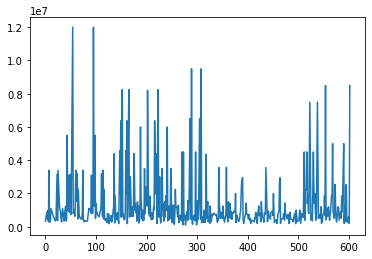

In [116]:
plt.plot(df_preproc['prop_price'])

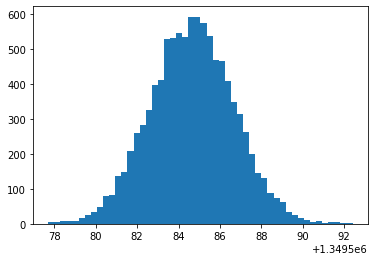

In [121]:
price_mean = df_preproc['prop_price'].mean()
values= np.random.normal(price_mean,2, 10000)
plt.hist(values,50)
plt.show()

In [122]:
price_mean

1349584.6237006236

# Train and test data

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
df_preproc

,city,prop_type,prop_size(lower),outcode,prop_price
0,reading,Offices,1340.0,RG,340000.0
3,reading,Offices,3502.0,HP,900000.0
4,reading,Offices,2034.0,HP,457500.0
5,reading,Offices,4141.0,GU,975000.0
6,reading,Offices,1065.0,HP,295000.0
...,...,...,...,...,...
597,maidenhead,Other,1800.0,GU,425000.0
599,bristol,Other,3000.0,BS,260000.0
600,bristol,Other,4014.0,CF,600000.0
601,swindon,Other,1012.0,OX,200000.0


In [136]:
X = df_preproc.drop(columns='prop_price')

In [137]:
y = df_preproc['prop_price']

In [138]:
X = pd.get_dummies(X)

In [139]:
X

,prop_size(lower),city_bristol,city_maidenhead,city_reading,city_slough,city_swindon,prop_type_Industrial,prop_type_Land,prop_type_Leisure,prop_type_Offices,...,outcode_SL,outcode_SM,outcode_SN,outcode_SP,outcode_SW,outcode_TA,outcode_TW,outcode_UB,outcode_W,outcode_WD
0,1340.0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,3502.0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2034.0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,4141.0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,1065.0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,1800.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
599,3000.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
600,4014.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
601,1012.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [140]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.10,random_state=42)

In [142]:
X_test

,prop_size(lower),city_bristol,city_maidenhead,city_reading,city_slough,city_swindon,prop_type_Industrial,prop_type_Land,prop_type_Leisure,prop_type_Offices,...,outcode_SL,outcode_SM,outcode_SN,outcode_SP,outcode_SW,outcode_TA,outcode_TW,outcode_UB,outcode_W,outcode_WD
106,1429.0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
525,1503.0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
490,2420.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
326,3318.0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
503,2004.0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
214,10560.0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
495,3041.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
466,1511.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112,4580.0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
569,4000.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Running models

In [174]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.datasets import make_regression

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,make_scorer

# Linear Regression

In [144]:
lin_regr = LinearRegression()

In [145]:
lin_regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [146]:
lin_regr.score(X_train,y_train)

0.28236342499966216

# Lasso and Ridge

In [149]:
L1_lin_regr = Lasso(alpha = 0.2,max_iter = 10000)
L1_lin_regr.fit(X_train,y_train)

/Users/asadimam/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 95989270793564.38, tolerance: 132393879761.98285
  positive)


Lasso(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [150]:
L1_lin_regr.score(X_train,y_train)

0.282363424944005

In [151]:
L2_lin_regr = Ridge(alpha=1.0)

L2_lin_regr.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [152]:
L2_lin_regr.score(X_train,y_train)

0.2700840614687747

# DecisionTree with GridSearchCV

In [180]:
scoring = make_scorer(r2_score)
g_cv = GridSearchCV(DecisionTreeRegressor(random_state=0),
              param_grid={'min_samples_split': range(2, 10)},
              scoring=scoring, cv=5, refit=True)

g_cv.fit(X_train, y_train)
g_cv.best_params_
g_cv.

result = g_cv.cv_results_
# print(result)
r2_score(y_test, g_cv.best_estimator_.predict(X_test))

/Users/asadimam/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.9048656523341655

In [184]:
y_g_cv_predict = g_cv.predict(X_test)

In [185]:
DTR_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_g_cv_predict.astype(int)})
DTR_pred

,Actual,Predicted
106,595000.0,515000
525,500000.0,496666
490,300000.0,400000
326,1250000.0,1250000
503,1000000.0,770000
214,1200000.0,1200000
495,180000.0,875000
466,475000.0,508333
112,1534000.0,1311333
569,895000.0,895000
